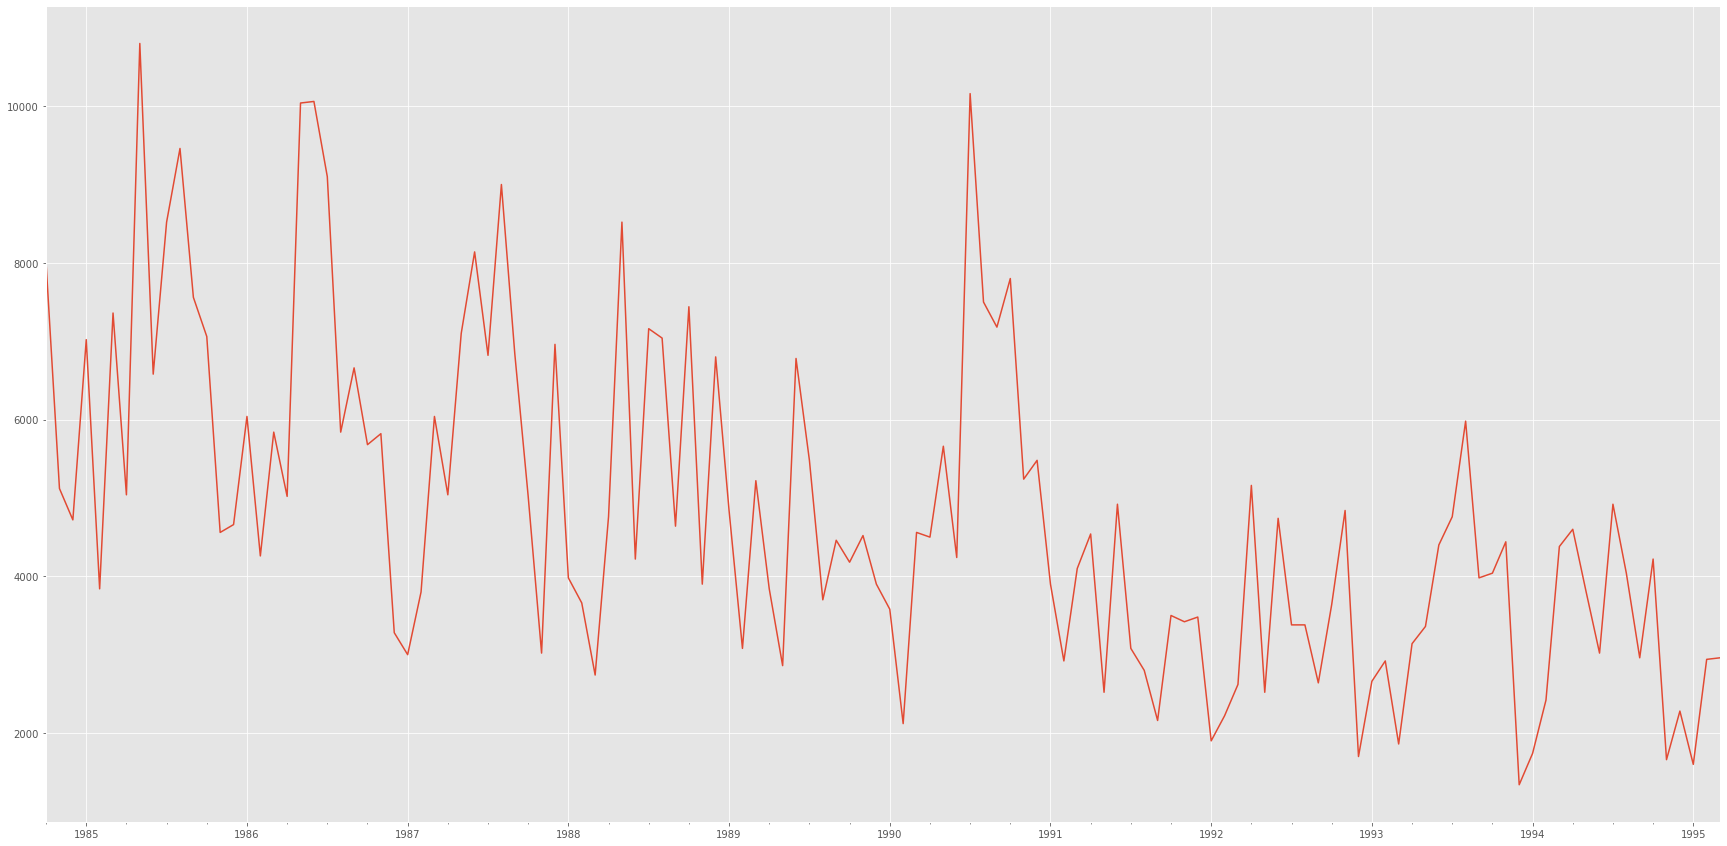

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import STL
from scipy.stats import boxcox 
from scipy.special import inv_boxcox
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sktime.forecasting.ets import AutoETS 
from itertools import product
import warnings 
from scipy.special import inv_boxcox
plt.style.use('ggplot')

m3_full=[8000,5120,4720,7020,3840,7360,5040,10800,6580,8520,9460,7560,7060,4560,4660,6040, 4260,5840,5020,
       10040,10060,9100,5840,6660,5680,5820, 3280, 3000,3800,6040,5040,7100,8140,6820,9000,6840,5020,
       3020,6960,3980,3660,2740,4760,8520,4220,7160,7040,4640,7440,3900,6800,4840,3080,5220,3840,2860,
       6780,5480,3700,4460,4180,4520,3900,3580,2120,4560,4500,5660,4240,10160,7500,7180,7800,5240,5480,
       3900,2920,4100,4540,	2520,4920,3080,2800,2160,3500,3420,3480,1900,2220,2620,5160,2520,4740,3380,3380,
       2640,3640,4840,1700,2660,2920,1860,3140,3360,4400,4760,5980,3980,4040,4440,1340,1740,2420,4380,4600,3800,
       3020,4920,4040,2960,4220,1660,2280,1600,2940,2960]

###一維度 dataframe tX1

m3_full= pd.Series(
    m3_full, index=pd.date_range("1984-10-1", periods=len(m3_full), freq="M"), name="m3_full")


T=len(m3_full)
m3_full.plot()
plt.show(block=True)




/var/folders/4p/_w7sb0h97x989ymb8f68ts_h0000gn/T/ipykernel_3448/2590131912.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  nb=np.int(n/l)+2


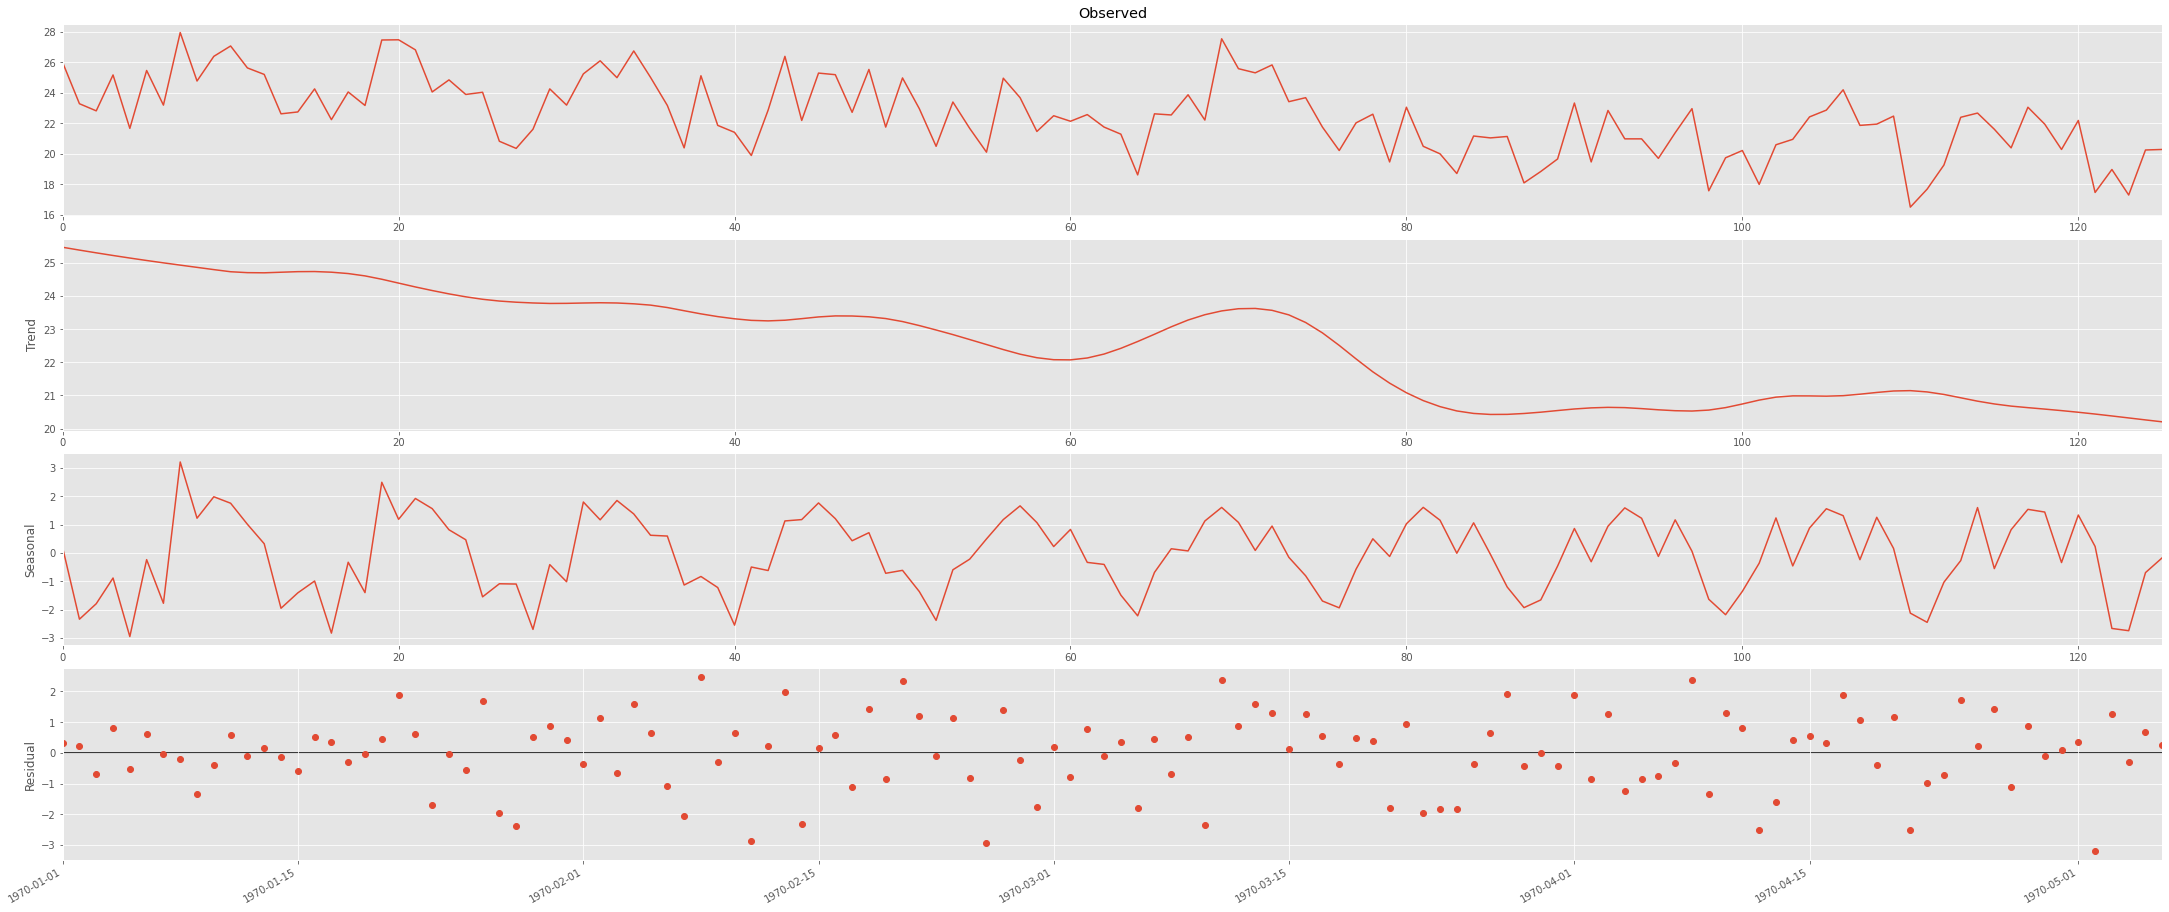

In [104]:
m3_full_transformed, lambda_ = boxcox(m3_full)
stl = STL(m3_full_transformed, seasonal=13,period=12)
res=stl.fit()
trend = res.trend
seasonal = res.seasonal
plt.rcParams["figure.figsize"]=(30,15)
res.plot()
def mbb(x,l):  #l block size
    n=len(x) #the length of data
    nb=np.int(n/l)+2
    idx=np.random.randint(n-l,size=nb)
    z=[]
    for ii in idx:
        z=z+list(x[ii:ii+l]) 
    z=z[np.random.randint(l):]
    z=z[:n]
    return(z)

z =mbb(res.resid,8)
z=pd.Series(z,index=m3_full.index)
z.plot()
plt.show()

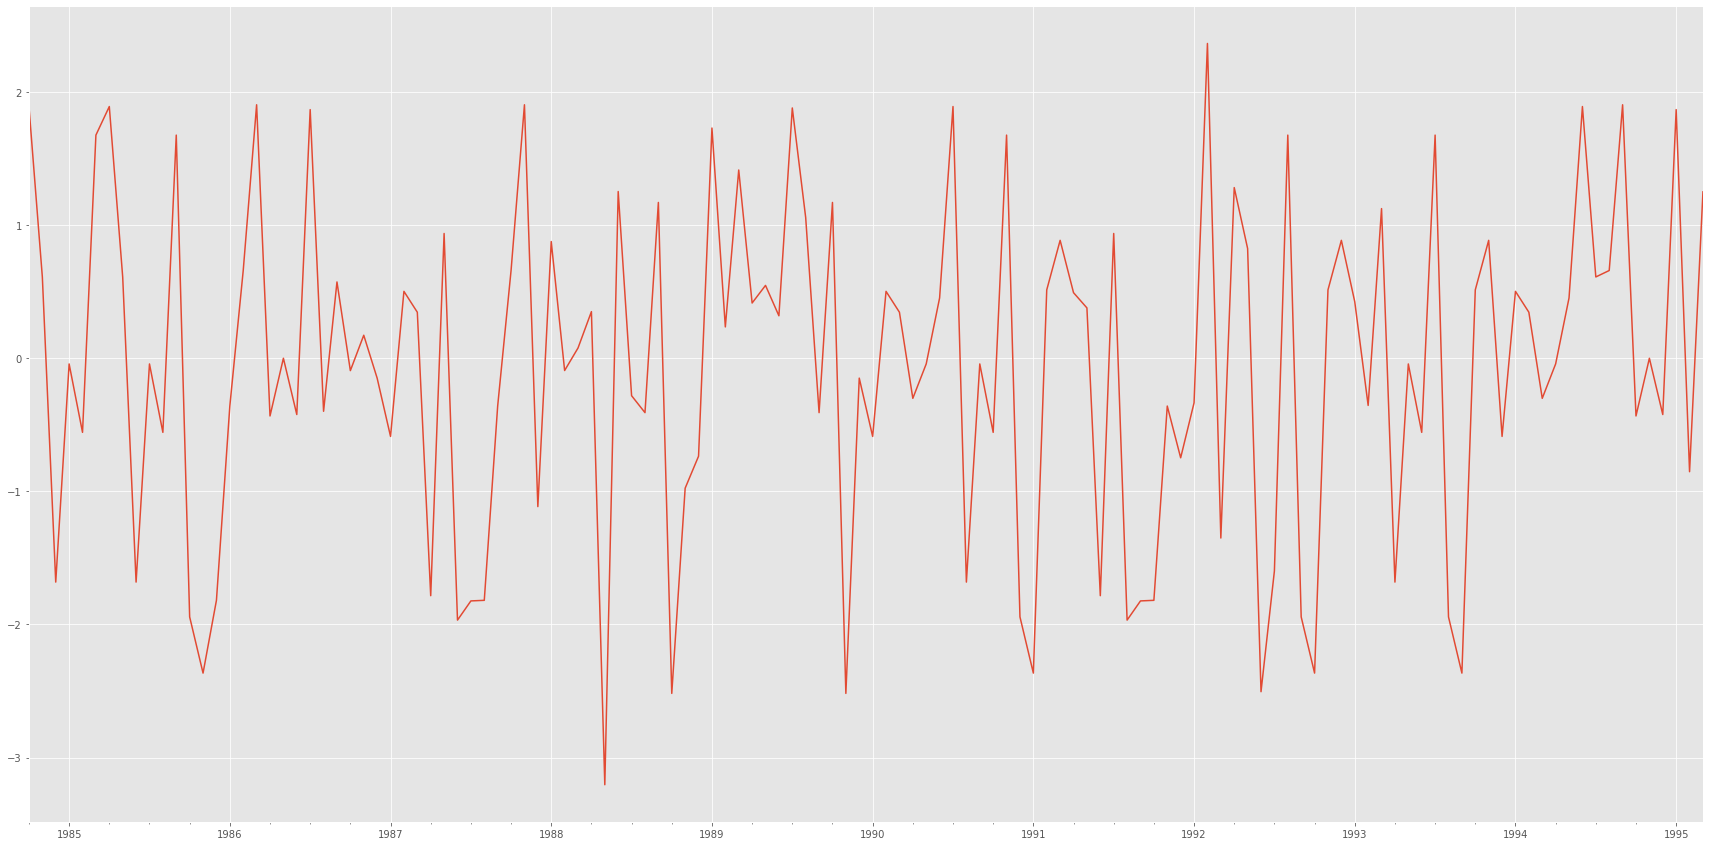

In [105]:
plt.rcParams["figure.figsize"]=(30,15)
z.plot()
plt.show(block=True)

In [109]:
#  moving block bootstrap
l = 24 # block size
B = 11 # number of bootstrapped series
T1=len(m3_full)+len(range(1,13))
fcast_h=list(range(1,13))

bt_m3_full = pd.DataFrame(np.zeros((len(m3_full),B)),index=m3_full.index) #
m3_full_fcast=pd.DataFrame(np.zeros((T1,B)),index=pd.date_range(start=m3_full.index[0],periods=T1,freq="M")) 

for bb in range(B):
    z = mbb(res.resid,l) 
    bt_m3_full.iloc[:,bb]= np.array(z)+trend+seasonal




/var/folders/4p/_w7sb0h97x989ymb8f68ts_h0000gn/T/ipykernel_3448/2590131912.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  nb=np.int(n/l)+2
/var/folders/4p/_w7sb0h97x989ymb8f68ts_h0000gn/T/ipykernel_3448/2590131912.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the r

In [110]:
inv_box_cox =inv_boxcox(bt_m3_full, lambda_)
inv_box_cox 


,0,1,2,3,4,5,6,7,8,9,10
1984-10-31,6619.329388,10903.632216,6946.557511,8402.442701,6616.276799,7485.621013,8966.884340,7887.086678,5493.539016,8226.113095,7552.542413
1984-11-30,6087.387572,6045.543350,6533.012829,2892.985255,7291.516886,5068.585328,4577.851650,6256.016835,3540.571802,5222.205711,4748.342354
1984-12-31,4281.839838,3773.746895,3773.746895,5543.035253,6529.314151,5194.668532,3878.962697,4385.509211,3861.082782,5060.041408,4222.702856
1985-01-31,5306.958005,4063.489021,4063.489021,8437.782987,6019.784824,5552.475602,6610.493204,7078.559112,5771.297261,6086.151108,5733.127841
1985-02-28,3690.110926,4634.559742,4634.559742,2737.669838,5176.695110,4625.509001,3737.833863,4159.621334,4754.797993,4585.145338,4683.554274
...,...,...,...,...,...,...,...,...,...,...,...
1994-11-30,2223.037111,3235.170133,3505.234089,2168.750513,4344.392207,3605.232009,2157.989814,3162.073322,3721.096920,2727.703635,3009.142928
1994-12-31,1165.038325,1980.670994,1887.718752,1023.138245,1131.413173,1379.458627,1678.416932,1552.599022,989.174151,891.937625,1737.149500
1995-01-31,1572.878924,1667.297509,1593.065481,1899.407776,989.397118,1070.148726,1265.034022,2415.799851,1187.614900,2277.970569,1875.102338
1995-02-28,2929.392629,2663.290604,2551.726099,3060.460129,2847.648532,4118.970096,2375.580681,1719.323468,2793.280277,2455.554062,3698.938809


this is mape  0.33623417642468717
this is mape  0.17674971248793392
this is mape  0.19856963358387322
this is mape  0.4667397803918098
this is mape  0.3885890430821613
this is mape  0.46044312560837825
this is mape  0.36964103903280576
this is mape  0.33245536641456064
this is mape  0.5475031915635997
this is mape  0.4138056553065898
this is mape  0.1845420255833047
model no best predict 1 0.17674971248793392
median mape 6 0.36964103903280576


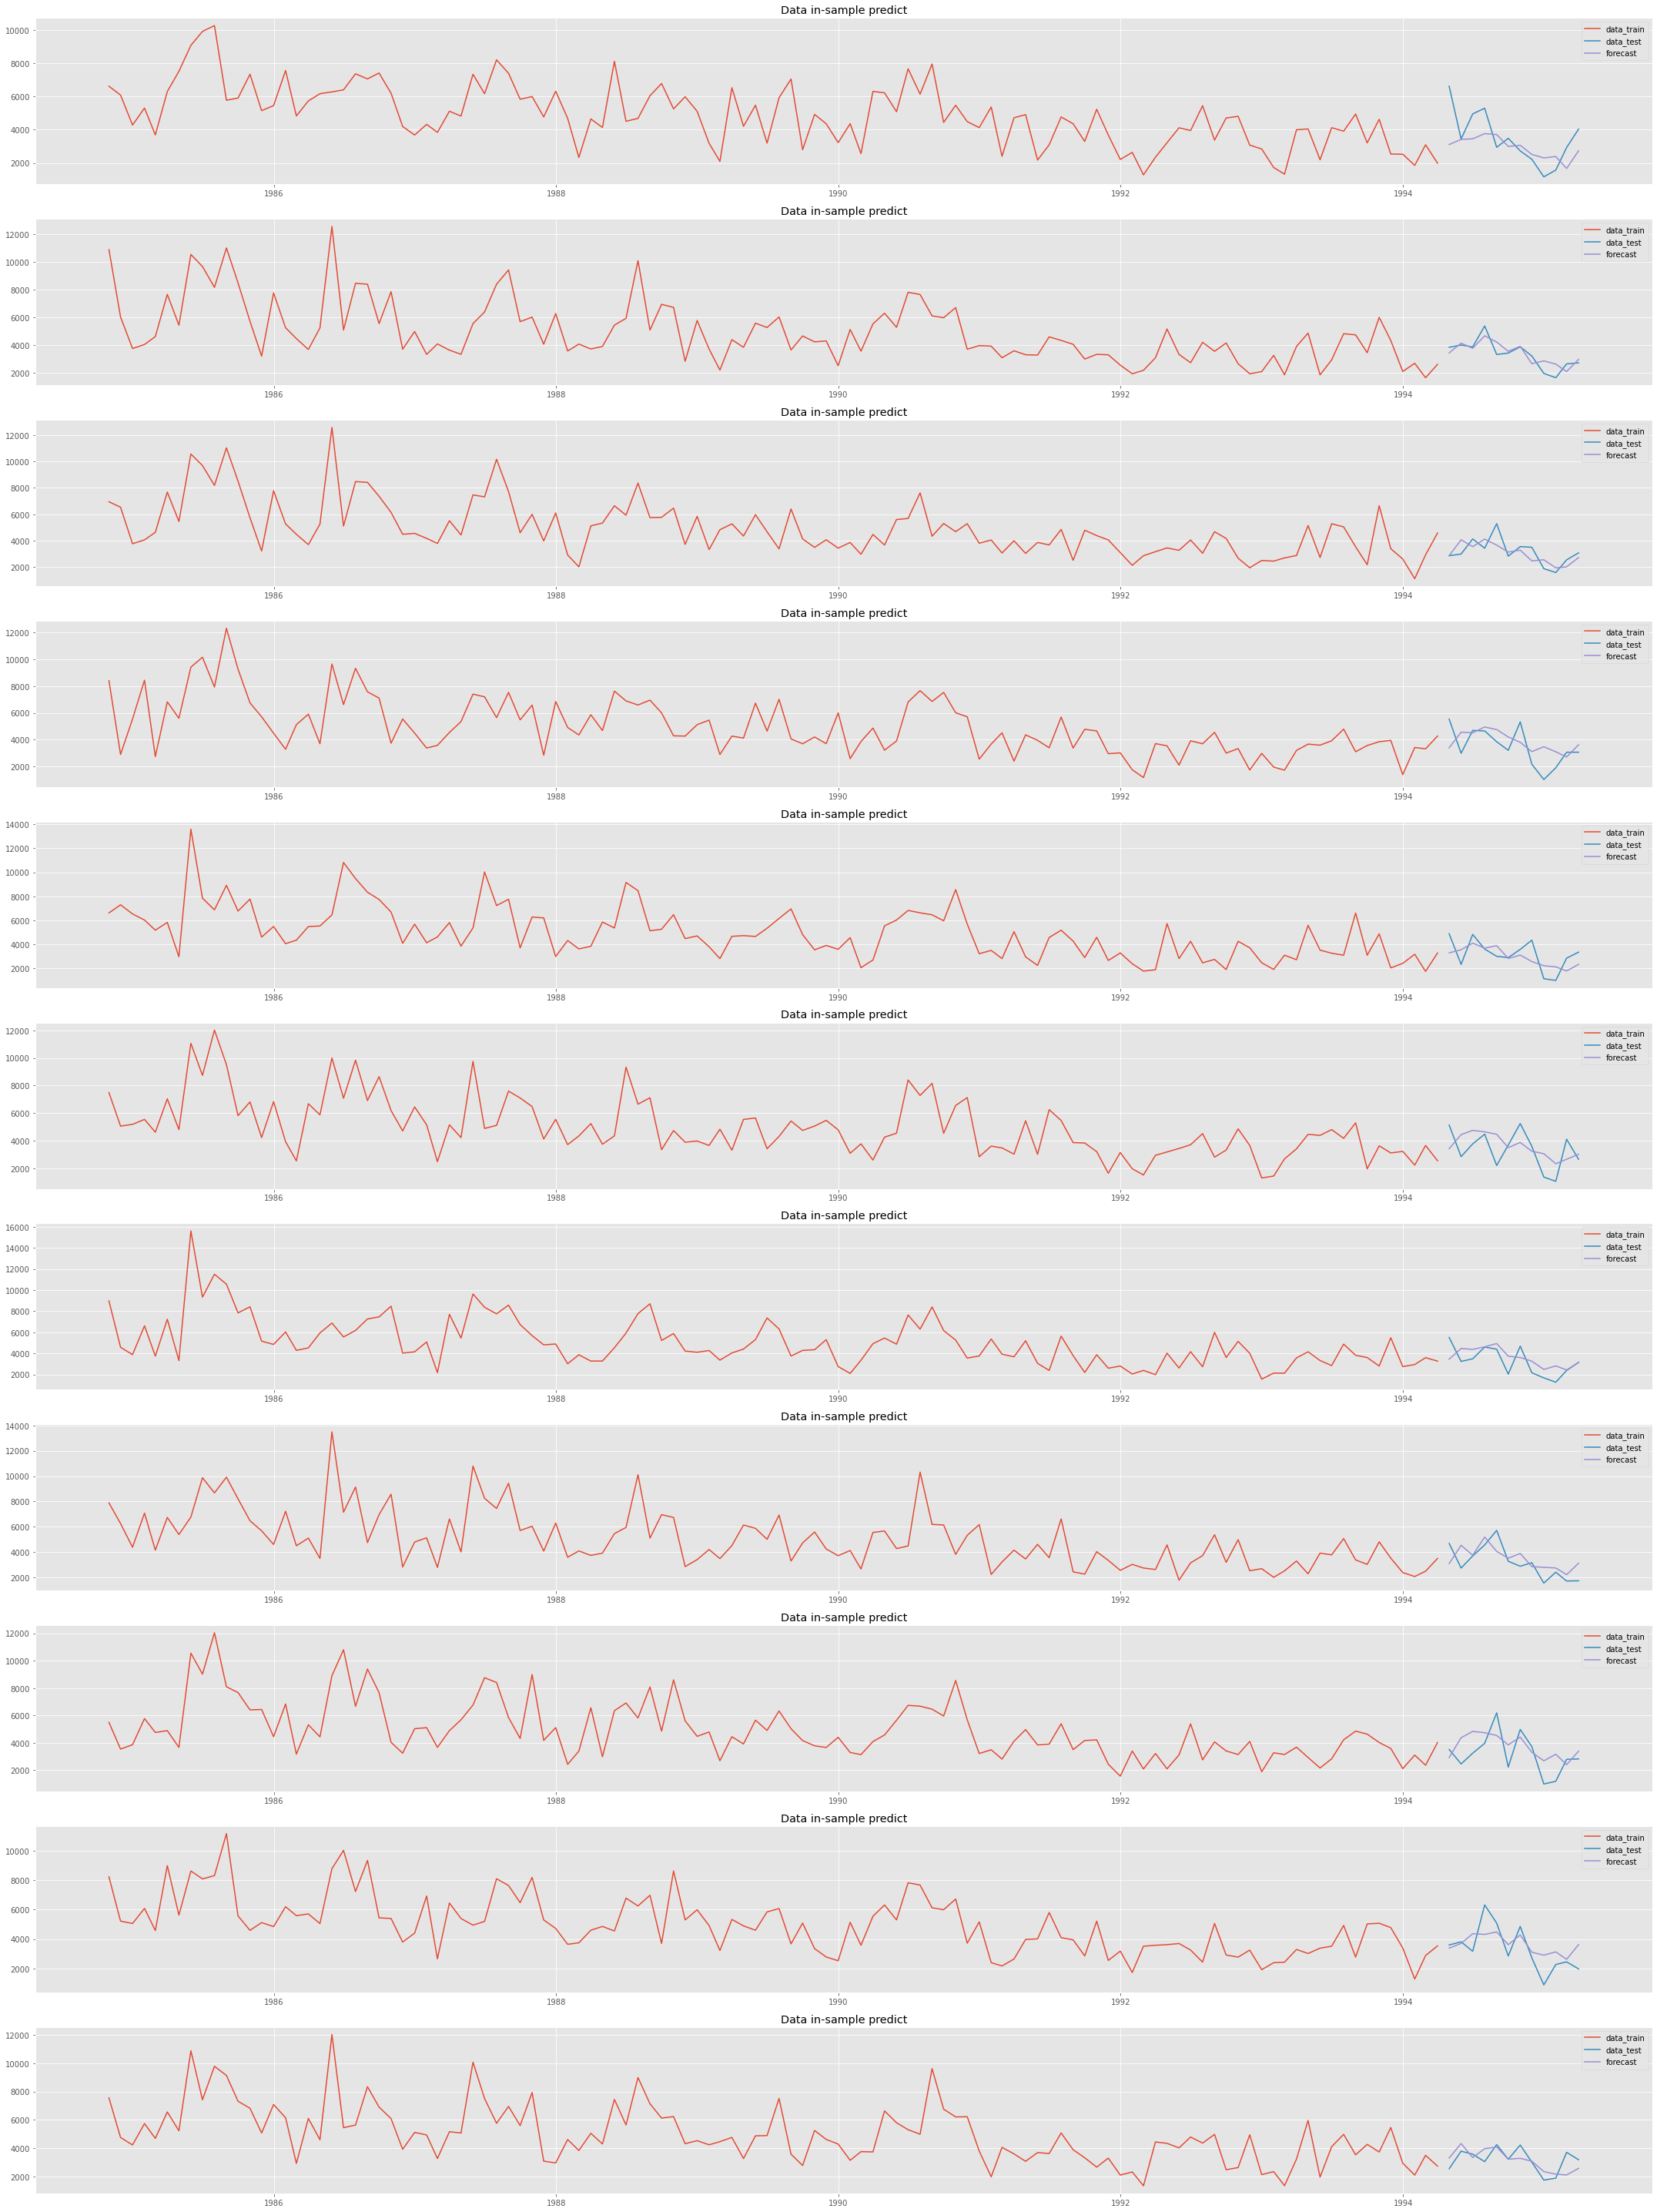

In [112]:

from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import matplotlib.pyplot as plt
plt.figure(figsize=(30,40))
MAPEs = []
for bb in range(B):
    inv_box_cox_series = inv_box_cox.iloc[:,bb]
    X_train, X_test = inv_box_cox_series[:-12], inv_box_cox_series[-12:]
    autoets = AutoETS(auto=True,n_jobs=-1,sp=12,maxiter=5000)
    autoets.fit(X_train)
    y_pred = autoets.predict(fcast_h)
    mape = mean_absolute_percentage_error(X_test, y_pred)
    print("this is mape ",mape)
    MAPEs.append(mape)
    np.median(MAPEs)
    plt.subplot(B, 1, bb + 1)
    plt.plot(X_train, label="data_train")
    plt.plot(X_test,label="data_test")
    plt.plot(X_test.index, y_pred, label="forecast")
    plt.title("Data in-sample predict")
    plt.legend(loc="best")
best_model = MAPEs.index(min(MAPEs))
print("model no best predict",best_model,np.min(MAPEs))
print("median mape",MAPEs.index(np.median(MAPEs)),np.median(MAPEs))

plt.tight_layout()
plt.savefig("data-in-sample-predict.jpg")
plt.show()




this is mape  0.33761192838161097
this is mape  0.18071392670425154
this is mape  0.20638856823480947
this is mape  0.5180457628253633
this is mape  0.38357362565667935
this is mape  0.4779295060069952
this is mape  0.37068736813148034
this is mape  0.3479750097285526
this is mape  0.5834593980700947
this is mape  0.43914576463904836
this is mape  0.18097446422604366
model no best predict 1


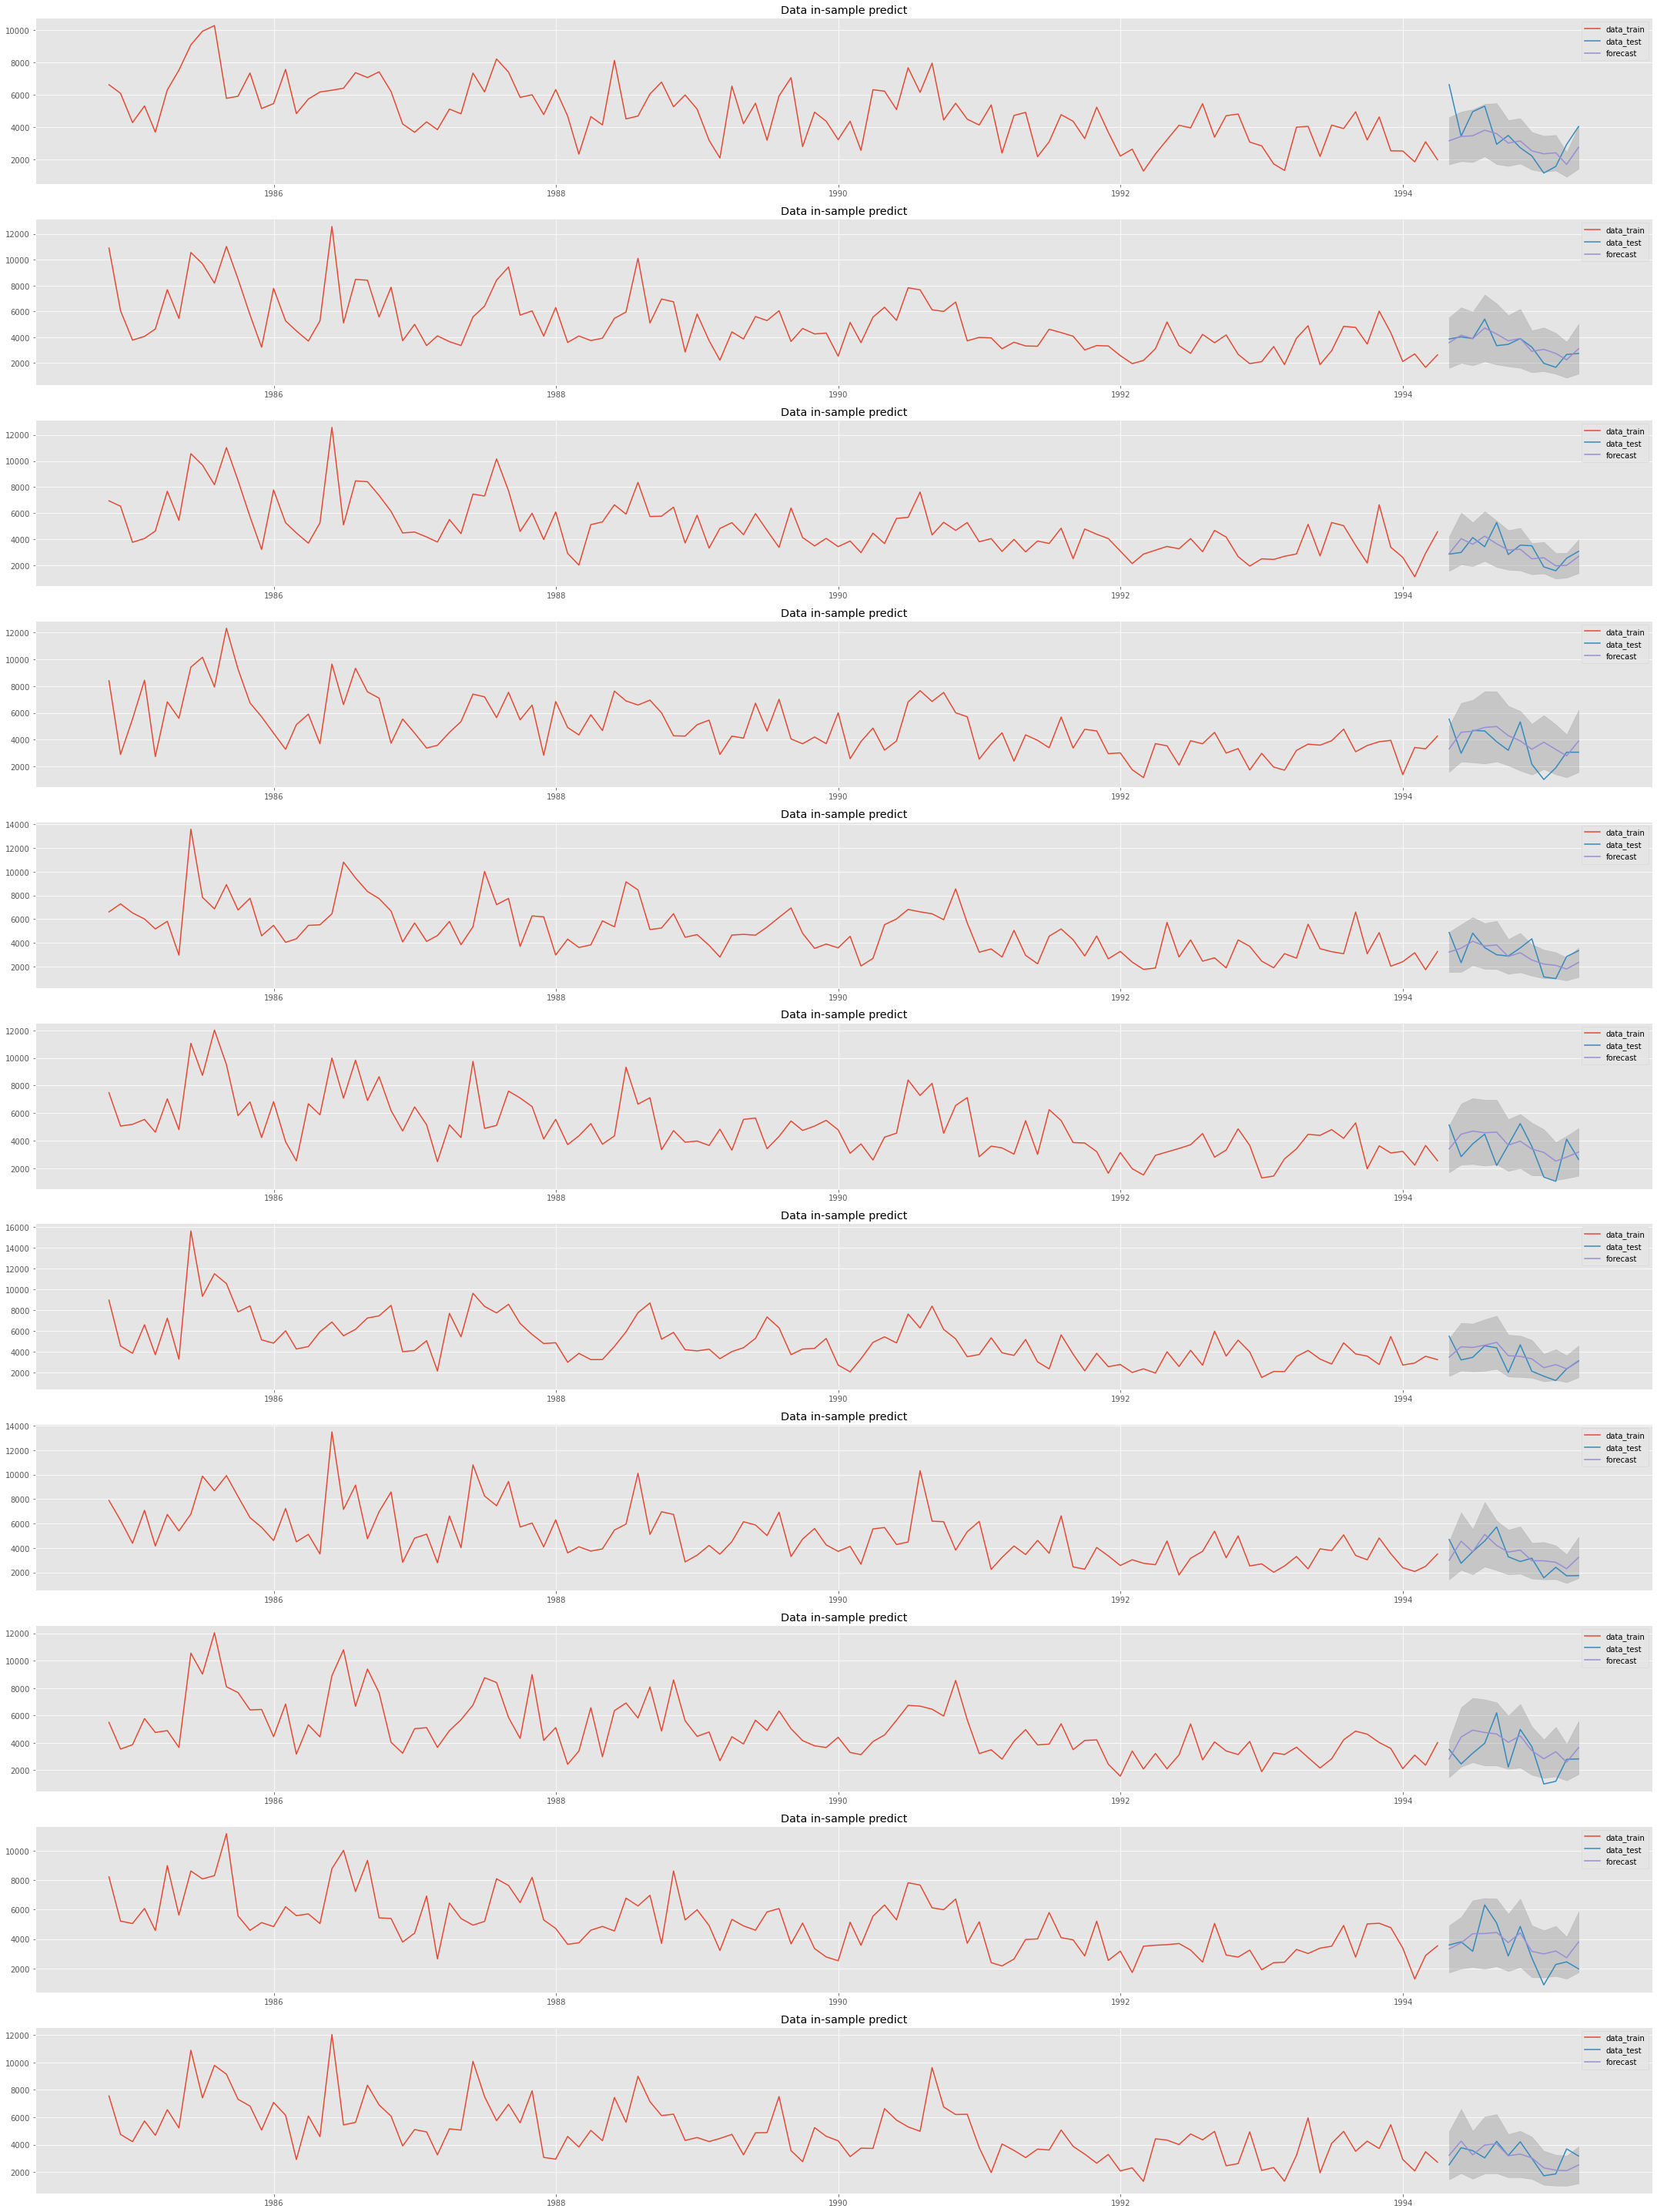

In [117]:
prdict_interval=pd.DataFrame(np.zeros((T1,B)),index=pd.date_range(start=m3_full.index[0],periods=T1,freq="M")) 
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import matplotlib.pyplot as plt
plt.figure(figsize=(30,40))
MAPEs = []
for bb in range(B):
    inv_box_cox_series = inv_box_cox.iloc[:,bb]
    X_train, X_test = inv_box_cox_series[:-12], inv_box_cox_series[-12:]
    autoets = AutoETS(auto=True,n_jobs=-1,sp=12,maxiter=5000)
    autoets.fit(X_train)
    fcst = autoets.predict_interval(fh=fcast_h, X=None, coverage=0.95)
    lower=fcst.iloc[:,0]
    upper = fcst.iloc[:,1]
    y_pred=(lower+upper)/2
    mape = mean_absolute_percentage_error(X_test, y_pred)
    print("this is mape ",mape)
    MAPEs.append(mape)
    plt.subplot(B, 1, bb + 1)
    plt.plot(X_train, label="data_train")
    plt.plot(X_test,label="data_test")
    plt.plot(X_test.index, y_pred, label="forecast")
    plt.fill_between(X_test.index, lower, upper, color='gray', alpha=0.3)
    plt.title("Data in-sample predict")
    plt.legend(loc="best")
best_model = MAPEs.index(min(MAPEs))
print("model no best predict",best_model)
plt.tight_layout()
#plt.savefig("data-in-sample-predict.jpg")
plt.show()


In [128]:

from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import matplotlib.pyplot as plt
plt.figure(figsize=(30,40))
MAPEs = []

for bb in range(B):
    inv_box_cox_series = inv_box_cox.iloc[:,bb]
    X_train, X_test = inv_box_cox_series[:-12], inv_box_cox_series[-12:]
    autoets = AutoETS(auto=True,n_jobs=-1,sp=12,maxiter=5000)
    autoets.fit(X_train)
    fcst = autoets.predict_interval(fh=fcast_h, X=None, coverage=0.95)
    lower=fcst.iloc[:,0]
    upper = fcst.iloc[:,1]
    y_pred=(lower+upper)/2
    mape = mean_absolute_percentage_error(X_test, y_pred)
    print("this is mape ",mape)
    MAPEs.append(mape)
    y_pred_df = pd.DataFrame(y_pred.values, index=X_test.index, columns=["mean"])
    lower_df = pd.DataFrame(lower.values, index=X_test.index, columns=["lower"])
    upper_df = pd.DataFrame(upper.values, index=X_test.index, columns=["upper"])
    result = pd.concat([y_pred_df, lower_df, upper_df], axis=1)
    print(result)
    




this is mape  0.338256567359335
                   mean        lower        upper
1994-04-30  3071.530911  1610.535567  4532.526254
1994-05-31  3453.279183  1832.180279  5074.378088
1994-06-30  3408.563853  1910.698396  4906.429311
1994-07-31  3754.826906  2017.135290  5492.518522
1994-08-31  3757.813542  1971.809736  5543.817349
1994-09-30  2971.124607  1567.399177  4374.850037
1994-10-31  3019.844809  1571.360910  4468.328707
1994-11-30  2481.723136  1434.088887  3529.357384
1994-12-31  2345.539878  1294.838412  3396.241344
1995-01-31  2370.091570  1249.894854  3490.288287
1995-02-28  1678.106434   925.001190  2431.211678
1995-03-31  2743.375224  1437.882005  4048.868443
this is mape  0.20185905044703034
                   mean        lower        upper
1994-04-30  3452.687202  1687.182987  5218.191416
1994-05-31  4092.876908  1777.786501  6407.967315
1994-06-30  4016.439361  1971.932276  6060.946447
1994-07-31  4847.142100  2054.233934  7640.050267
1994-08-31  4362.618144  2009.6858

<Figure size 2160x2880 with 0 Axes>

In [129]:

for bb in range(B):
    inv_box_cox_series = inv_box_cox.iloc[:,bb]
    X_train, X_test = inv_box_cox_series[:-12], inv_box_cox_series[-12:]
    autoets = AutoETS(auto=True,n_jobs=-1,sp=12,maxiter=5000)
    autoets.fit(X_train)
    y_pred = autoets.predict(fcast_h)
    print(autoets.summary())


                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  114
Model:                       ETS(MAM)   Log Likelihood                -959.326
Date:                Thu, 09 Feb 2023   AIC                           1954.653
Time:                        17:16:20   BIC                           2003.904
Sample:                    10-31-1984   HQIC                          1974.641
                         - 03-31-1994   Scale                            0.056
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.0001        nan        nan        nan         nan         nan
smoothing_trend          1e-08      0.002   4.27e-06      1.000      -0.005       0.005
smoothing_season

                                 ETS Results                                  
Dep. Variable:                      4   No. Observations:                  114
Model:                       ETS(MAM)   Log Likelihood                -972.160
Date:                Thu, 09 Feb 2023   AIC                           1980.320
Time:                        17:16:21   BIC                           2029.571
Sample:                    10-31-1984   HQIC                          2000.308
                         - 03-31-1994   Scale                            0.070
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.0001        nan        nan        nan         nan         nan
smoothing_trend          1e-08      0.002   4.57e-06      1.000      -0.004       0.004
smoothing_season

                                 ETS Results                                  
Dep. Variable:                      8   No. Observations:                  114
Model:                       ETS(MNM)   Log Likelihood                -963.754
Date:                Thu, 09 Feb 2023   AIC                           1959.509
Time:                        17:16:22   BIC                           2003.288
Sample:                    10-31-1984   HQIC                          1977.276
                         - 03-31-1994   Scale                            0.057
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.2016      0.061      3.284      0.001       0.081       0.322
smoothing_seasonal   7.984e-05        nan        nan        nan         nan         nan
initial_level   

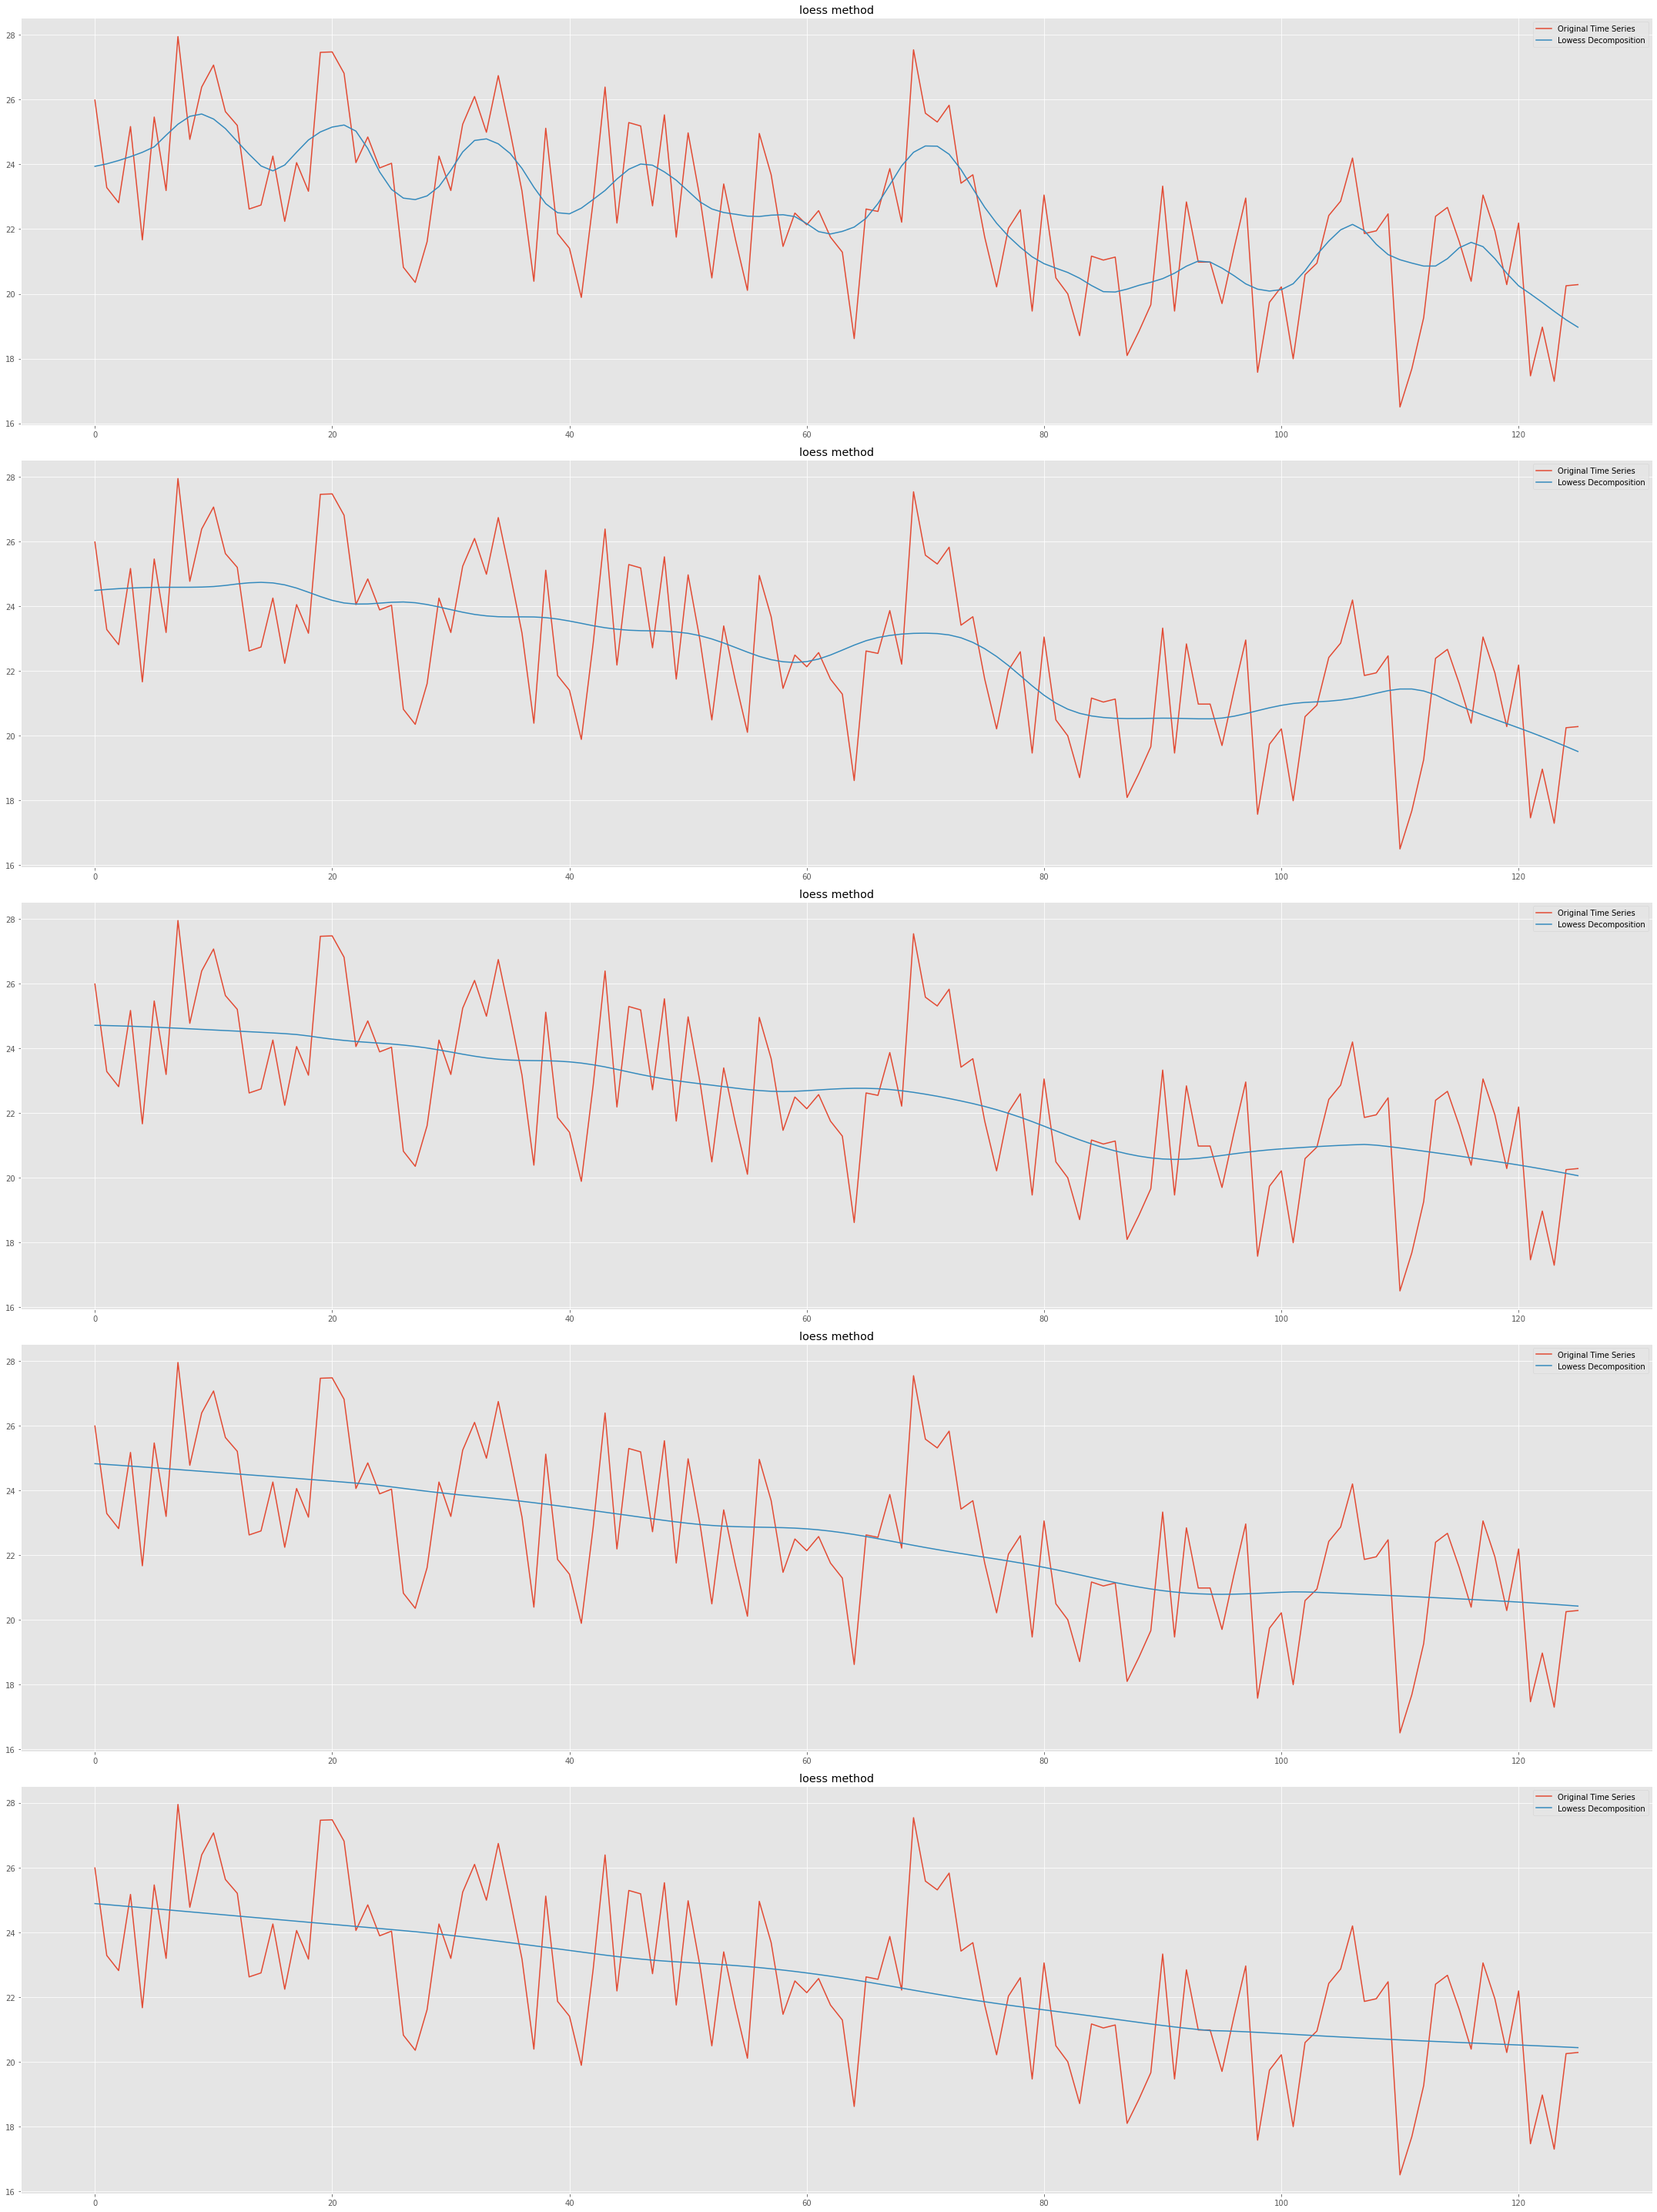

In [130]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox 
from statsmodels.nonparametric.smoothers_lowess import lowess

m3_full=[8000,5120,4720,7020,3840,7360,5040,10800,6580,8520,9460,7560,7060,4560,4660,6040, 4260,5840,5020,
       10040,10060,9100,5840,6660,5680,5820, 3280, 3000,3800,6040,5040,7100,8140,6820,9000,6840,5020,
       3020,6960,3980,3660,2740,4760,8520,4220,7160,7040,4640,7440,3900,6800,4840,3080,5220,3840,2860,
       6780,5480,3700,4460,4180,4520,3900,3580,2120,4560,4500,5660,4240,10160,7500,7180,7800,5240,5480,
       3900,2920,4100,4540,	2520,4920,3080,2800,2160,3500,3420,3480,1900,2220,2620,5160,2520,4740,3380,3380,
       2640,3640,4840,1700,2660,2920,1860,3140,3360,4400,4760,5980,3980,4040,4440,1340,1740,2420,4380,4600,3800,
       3020,4920,4040,2960,4220,1660,2280,1600,2940,2960]

m3_full= pd.Series(
    m3_full, index=pd.date_range("1984-10-1", periods=len(m3_full), freq="M"), name="m3_full")

m3_full_transformed, lambda_ = boxcox(m3_full)
plt.figure(figsize=(30,40))
frac=np.linspace(0.1,0.5,5)
for i in range(len(frac)):
    fit = lowess(m3_full_transformed, np.arange(len(m3_full_transformed)), frac=frac[i])
    plt.subplot(5, 1, i + 1)
    plt.plot(m3_full_transformed, label="Original Time Series")
    plt.plot(fit[:,0], fit[:,1], label="Lowess Decomposition")
    plt.title("loess method")
    plt.legend(loc="best")
plt.tight_layout()
plt.savefig("loess.jpg")
plt.show()
